<a href="https://colab.research.google.com/github/BVika/IIS/blob/main/%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D0%BA%D0%B0_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Практика 1
Тема: кластеризация (методом k-средних)
Дано: Массив точек на плоскости.
Требуется:
1. Найти минимальное кол-во кластеров, обеспечивающих приемлемый уровень
кластеризации.
2. Выполнить кластеризацию данного множества точек методом k-средних по найденному
кол-ву кластеров (выбор координат начальных центров масс кластеров не важен).
3. Напечатать:
- количество точек в каждом кластере
- координаты центроидов кластеров.
4. Выполнить кластеризацию (шаг 2) с визуализацией для 3 любых различных значений
параметра random_state
(https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)
Указания к выполнению: визуализировать график метода Elbow, визуализировать результаты
кластеризации вместе с центроидами. Среда выполнения: любые среды с Python или Rstudio.
Фрагменты программного кода в отчете приводить не требуется (сохраните их у себя).


### Вариант 99

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

data = np.array([[20.04307293,16.96341543],
  [ 1.78941368, 5.14002165],
  [ 0.49845006, 5.49633502],
  [ 6.85064349, 0.72231957],
  [ 7.33034433, 1.08468884],
  [12.89162751,10.40193948],
  [ 8.1156781 , 0.91372363],
  [ 8.47116391, 1.16100772],
  [ 2.48250926, 6.56166816],
  [ 1.36837294, 6.30404777],
  [21.65285751,17.25712628],
  [13.09421724,12.3465116 ],
  [19.53523525,15.8961005 ],
  [21.49794789,15.10659623],
  [ 7.59304545, 1.78083422],
  [21.11404461,16.42210769],
  [22.89984864,14.0921258 ],
  [ 8.99872175, 0.65119536],
  [12.75234033,12.11003749],
  [ 1.57555602, 5.84271019],
  [13.27776822, 8.15756735],
  [20.66895585,16.47802029],
  [13.31853749,10.49992953],
  [ 2.39943869, 5.47254993],
  [21.19600428,16.89145185],
  [-0.07428153, 5.31410375],
  [ 8.96730441, 0.95890485],
  [13.06008456, 7.30559596],
  [-0.28691742, 6.12326206],
  [ 8.03503973, 0.48654307],
  [ 7.74068181, 1.39976373],
  [ 1.06959017, 6.1162102 ],
  [ 8.07121156, 1.88536437],
  [13.27125281, 7.59940856],
  [11.91308053,10.86624183],
  [20.06513347,19.52528921],
  [19.29490564,18.86327601],
  [ 8.22300111, 1.19898328],
  [21.25973897,17.15259456],
  [22.09661912,17.97449589],
  [12.43691112,12.44093967],
  [ 0.88273434, 5.48711519],
  [ 3.93752107, 6.28433115],
  [12.25463527,10.48358761],
  [12.760769 , 9.93316963],
  [13.56036014, 7.53018228],
  [ 1.21153214, 5.15482864],
  [ 7.62191528, 0.48604777]])

### Найти минимальное кол-во кластеров, обеспечивающих приемлемый уровень кластеризации.

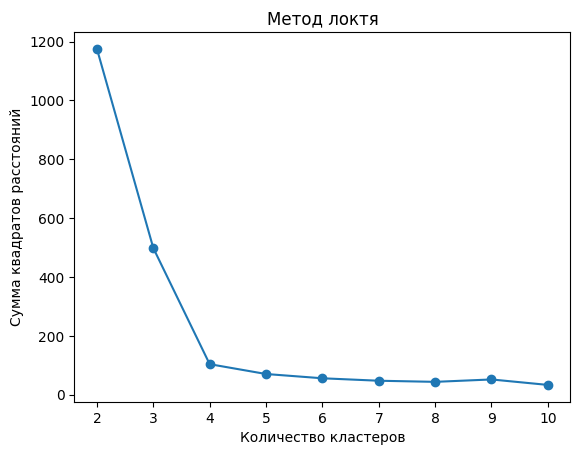

In [3]:
# список для сохранения значений инерции (сумма квадратов расстояний от точек до ближ. центроидов)
inertia_values = []
# Перебираем количество кластеров
for k in range(2, 11):
 # объект KMeans с текущим количеством кластеров
 kmeans = KMeans( n_clusters = k)
 kmeans.fit( data )
 # Сохраняем значение инерции - мерой компактности кластеров.
 # Он вычисляется как сумма квадратов расстояний между каждым объектом данных и центроидом
 inertia_values.append( kmeans.inertia_ )

plt.plot(range(2, 11), inertia_values, marker='o')
plt.xlabel("Количество кластеров")
plt.ylabel("Сумма квадратов расстояний")
plt.title("Метод локтя")
plt.show()

Сумма квадротов расстояний от точек до ближайших центроидов существенно не меняется после
указания 4 кластеров. Таким образом, считаем достаточным 4 кластера.

### Выполнить кластеризацию данного множества точек методом k-средних по найденному кол-ву кластеров (выбор координат начальных центров масс кластеров не важен).

### Напечатать:
количество точек в каждом кластере
координаты центроидов кластеров.

Метки кластеров:
[2 1 1 3 3 0 3 3 1 1 2 0 2 2 3 2 2 3 0 1 0 2 0 1 2 1 3 0 1 3 3 1 3 0 0 2 2
 3 2 2 0 1 1 0 0 0 1 3]
Координаты центроидов кластеров:
[[12.88263202  9.97292592]
 [ 1.40449329  5.77476531]
 [20.94369701 16.88521664]
 [ 8.00156258  1.06078137]]
В кластере с меткой 0 содержится 12 точек
В кластере с меткой 1 содержится 12 точек
В кластере с меткой 2 содержится 12 точек
В кластере с меткой 3 содержится 12 точек


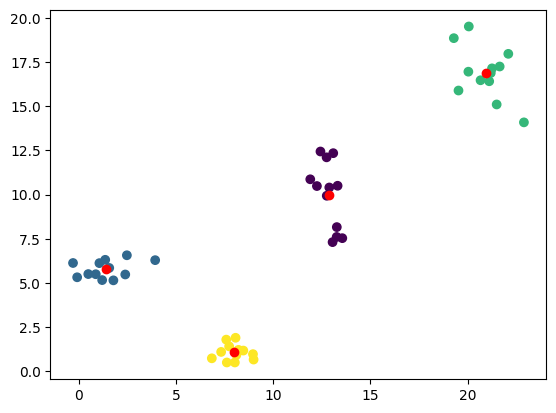

In [5]:
kmeans = KMeans( n_clusters = 4 )
# Производим кластеризацию данных
kmeans.fit( data )
# метки кластеров для каждого объекта
labels = kmeans.labels_
# координаты центроидов
centroids = kmeans.cluster_centers_
print("Метки кластеров:")
print(labels)
print("Координаты центроидов кластеров:")
print(centroids)
labelNum = np.unique(labels)
for v in labelNum:
 print(f"В кластере с меткой {v} содержится {np.sum(labels == v)} точек" )
plt.scatter(data[:,0], data[:,1], c = labels )
plt.scatter(centroids[:,0], centroids[:,1], c = "r")
plt.show()


### Выполнить кластеризацию (шаг 2) с визуализацией для 3 любых различных значений параметра random_state (https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)

Метки кластеров:
[1 3 3 0 0 2 0 0 3 3 1 2 1 1 0 1 1 0 2 3 2 1 2 3 1 3 0 2 3 0 0 3 0 2 2 1 1
 0 1 1 2 3 3 2 2 2 3 0]
Координаты центроидов кластеров:
[[ 8.00156258  1.06078137]
 [20.94369701 16.88521664]
 [12.88263202  9.97292592]
 [ 1.40449329  5.77476531]]
В кластере с меткой 0 содержится 12 точек
В кластере с меткой 1 содержится 12 точек
В кластере с меткой 2 содержится 12 точек
В кластере с меткой 3 содержится 12 точек


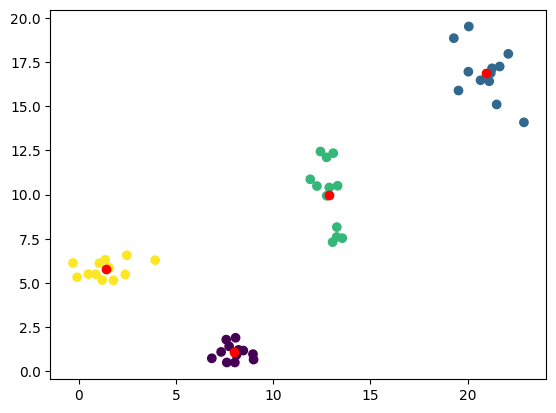

In [10]:
kmeans = KMeans( n_clusters = 4, random_state=0 )
# Производим кластеризацию данных
kmeans.fit( data )
# метки кластеров для каждого объекта
labels = kmeans.labels_
# координаты центроидов
centroids = kmeans.cluster_centers_
print("Метки кластеров:")
print(labels)
print("Координаты центроидов кластеров:")
print(centroids)
labelNum = np.unique(labels)
for v in labelNum:
 print(f"В кластере с меткой {v} содержится {np.sum(labels == v)} точек" )
plt.scatter(data[:,0], data[:,1], c = labels )
plt.scatter(centroids[:,0], centroids[:,1], c = "r")
plt.show()

Метки кластеров:
[1 3 3 0 0 2 0 0 3 3 1 2 1 1 0 1 1 0 2 3 2 1 2 3 1 3 0 2 3 0 0 3 0 2 2 1 1
 0 1 1 2 3 3 2 2 2 3 0]
Координаты центроидов кластеров:
[[ 8.00156258  1.06078137]
 [20.94369701 16.88521664]
 [12.88263202  9.97292592]
 [ 1.40449329  5.77476531]]
В кластере с меткой 0 содержится 12 точек
В кластере с меткой 1 содержится 12 точек
В кластере с меткой 2 содержится 12 точек
В кластере с меткой 3 содержится 12 точек


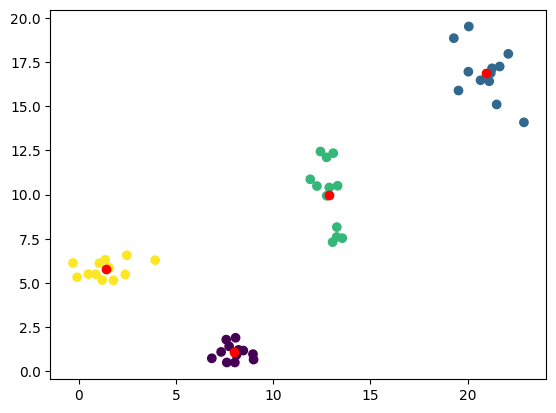

In [11]:
kmeans = KMeans( n_clusters = 4, random_state=12 )
# Производим кластеризацию данных
kmeans.fit( data )
# метки кластеров для каждого объекта
labels = kmeans.labels_
# координаты центроидов
centroids = kmeans.cluster_centers_
print("Метки кластеров:")
print(labels)
print("Координаты центроидов кластеров:")
print(centroids)

labelNum = np.unique(labels)
for v in labelNum:
 print(f"В кластере с меткой {v} содержится {np.sum(labels == v)} точек" )
plt.scatter(data[:,0], data[:,1], c = labels )
plt.scatter(centroids[:,0], centroids[:,1], c = "r")
plt.show()

Метки кластеров:
[1 2 2 0 0 3 0 0 2 2 1 3 1 1 0 1 1 0 3 2 3 1 3 2 1 2 0 3 2 0 0 2 0 3 3 1 1
 0 1 1 3 2 2 3 3 3 2 0]
Координаты центроидов кластеров:
[[ 8.00156258  1.06078137]
 [20.94369701 16.88521664]
 [ 1.40449329  5.77476531]
 [12.88263202  9.97292592]]
В кластере с меткой 0 содержится 12 точек
В кластере с меткой 1 содержится 12 точек
В кластере с меткой 2 содержится 12 точек
В кластере с меткой 3 содержится 12 точек


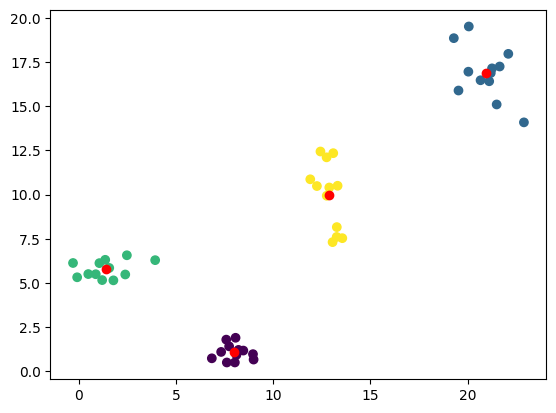

In [12]:
kmeans = KMeans( n_clusters = 4, random_state=42 )
# Производим кластеризацию данных
kmeans.fit( data )
# метки кластеров для каждого объекта
labels = kmeans.labels_
# координаты центроидов
centroids = kmeans.cluster_centers_
print("Метки кластеров:")
print(labels)
print("Координаты центроидов кластеров:")
print(centroids)

labelNum = np.unique(labels)
for v in labelNum:
 print(f"В кластере с меткой {v} содержится {np.sum(labels == v)} точек" )
plt.scatter(data[:,0], data[:,1], c = labels )
plt.scatter(centroids[:,0], centroids[:,1], c = "r")
plt.show()


 _Результаты для random_state = 0_ 
Метки кластеров:
[1 3 3 0 0 2 0 0 3 3 1 2 1 1 0 1 1 0 2 3 2 1 2 3 1 3 0 2 3 0 0 3 0 2 2 1 1
 0 1 1 2 3 3 2 2 2 3 0]
Координаты центроидов кластеров:
[[ 8.00156258  1.06078137]
 [20.94369701 16.88521664]
 [12.88263202  9.97292592]
 [ 1.40449329  5.77476531]]
В кластере с меткой 0 содержится 12 точек
В кластере с меткой 1 содержится 12 точек
В кластере с меткой 2 содержится 12 точек
В кластере с меткой 3 содержится 12 точек


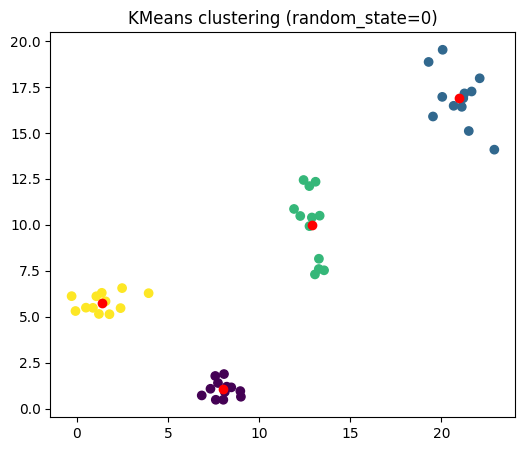


 _Результаты для random_state = 18_ 
Метки кластеров:
[2 0 0 3 3 1 3 3 0 0 2 1 2 2 3 2 2 3 1 0 1 2 1 0 2 0 3 1 0 3 3 0 3 1 1 2 2
 3 2 2 1 0 0 1 1 1 0 3]
Координаты центроидов кластеров:
[[ 1.40449329  5.77476531]
 [12.88263202  9.97292592]
 [20.94369701 16.88521664]
 [ 8.00156258  1.06078137]]
В кластере с меткой 0 содержится 12 точек
В кластере с меткой 1 содержится 12 точек
В кластере с меткой 2 содержится 12 точек
В кластере с меткой 3 содержится 12 точек


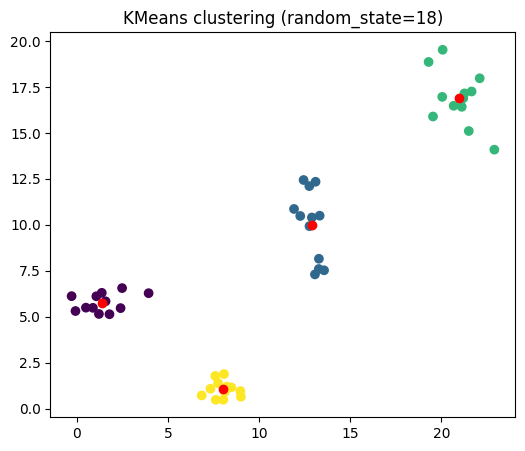


 _Результаты для random_state = 42_ 
Метки кластеров:
[1 2 2 0 0 3 0 0 2 2 1 3 1 1 0 1 1 0 3 2 3 1 3 2 1 2 0 3 2 0 0 2 0 3 3 1 1
 0 1 1 3 2 2 3 3 3 2 0]
Координаты центроидов кластеров:
[[ 8.00156258  1.06078137]
 [20.94369701 16.88521664]
 [ 1.40449329  5.77476531]
 [12.88263202  9.97292592]]
В кластере с меткой 0 содержится 12 точек
В кластере с меткой 1 содержится 12 точек
В кластере с меткой 2 содержится 12 точек
В кластере с меткой 3 содержится 12 точек


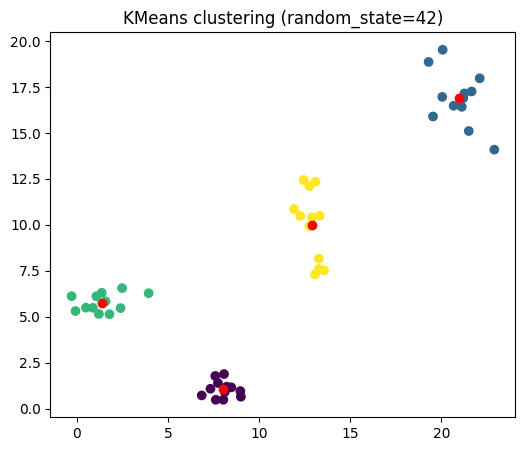

In [22]:
random_states = [0, 18, 42]

for i, rs in enumerate(random_states):
    kmeans = KMeans(n_clusters=4, random_state=rs)
    kmeans.fit(data)
    labels = kmeans.labels_
    centroids = kmeans.cluster_centers_

    print(f"\n _Результаты для random_state = {rs}_ ")
    print("Метки кластеров:")
    print(labels)
    print("Координаты центроидов кластеров:")
    print(centroids)

    # Количество точек в каждом кластере
    labelNum = np.unique(labels)
    for v in labelNum:
        count = np.sum(labels == v)
        print(f"В кластере с меткой {v} содержится {count} точек")

    # Визуализация
    plt.figure(figsize=(6, 5))
    plt.scatter(data[:, 0], data[:, 1], c=labels)
    plt.scatter(centroids[:, 0], centroids[:, 1], c='r')

    plt.title(f"KMeans clustering (random_state={rs})")
    plt.show()

